## Machine_learning_with_python
###### Afroza, Agricultural researcher

(A) Load the data

(B) Separating the numeric features and target variable

(C) Split the original dataset into the train set (80%) and the test set (20%)

(D) Perform Linear Regression and Predict the 'Price' from the test set

(E) Find the RMSE value from the actual test data and the predicted data.

Perform One-hot Encoding

Split the original dataset into the train set (80%) and the test set (20%),

Perform Linear Regression and Predict the 'Price' from the test set,

Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients)

(F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.

(G) Compare the actual and predicted target variable through visualization

Original data source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import os as os

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### (A) Load the data


In [12]:
df = pd.read_csv("ford.csv")
display(df.head(10))
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)


##### Dataset is loaded

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


##### Informations of data

In [14]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


##### Column names of data

#### (B) Separating the numeric features and target variable

In [15]:
features = ['year', 'mileage', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(17964, 4) (17964, 1)


##### Numeric features and target variables are separated

#### (C) Split the original dataset into the train set (80%) and the test set (20%)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 4) (3593, 4) (14371, 1) (3593, 1)


##### The original dataset are splitted into the train set (80%) and the test set (20%)

#### (D) Perform Linear Regression and Predict the 'Price' from the test set

In [17]:
model = LinearRegression()
model = model.fit(X_train, y_train)

##### Linear Regression 

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred)

[[12511.62021941]
 [11728.1369248 ]
 [12146.83147139]
 ...
 [ 7682.61502627]
 [ 5954.1544702 ]
 [16941.0886637 ]]


In [20]:
print(y_test)

       price
1087   16700
9367    9690
4705   10999
10336  29350
8509   11250
...      ...
14866  13487
11183  15299
13788   5495
17265   5685
16043  16495

[3593 rows x 1 columns]


##### Prediction of the 'Price' is performed from the test set 

#### (E) Find the RMSE value from the actual test data and the predicted data.

In [21]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

2471.5647447160786


### This is the end of HW1

##### One-hot Encoding

In [22]:
df = pd.get_dummies(df, drop_first=True)

#### Separating the features and target variable

In [24]:
target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(17964, 32) (17964, 1)


#### Create train and test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 32) (3593, 32) (14371, 1) (3593, 1)


#### Training with Linear Regression

In [26]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Prediction

In [27]:
y_pred = model.predict(X_test)
print(y_pred)

[[14184.68197153]
 [10656.02555946]
 [11867.63422553]
 ...
 [ 6868.41066093]
 [ 8979.27683283]
 [15955.91949667]]


#### Linear Regression Coefficients

In [28]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
15,model_ Ka+,-2.969547e+03
26,transmission_Manual,-4.757194e+02
14,model_ KA,-4.506522e+02
31,fuelType_Petrol,-2.254175e+02
27,transmission_Semi-Auto,-1.472017e+02
2,mpg,-7.659271e+01
1,mileage,-6.168294e-02
22,model_ Streetka,-1.409717e-11
4,model_ C-MAX,1.086998e+03
0,year,1.123913e+03




A positive sign indicates that as the feature variable increases, the target variable also increases.

A negative sign indicates that as the feature variable increases, the target variable decreases.

#### Intercept


In [29]:
model.intercept_

array([-2253986.573092])

#### Error prediction 

In [30]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1376.611796005608
mean absolute percentage error =  0.14670756306773125
mean squared error =  3426372.061700022
root mean squared error =  1851.0462073378994
coefficient of determination =  0.8484983735532781


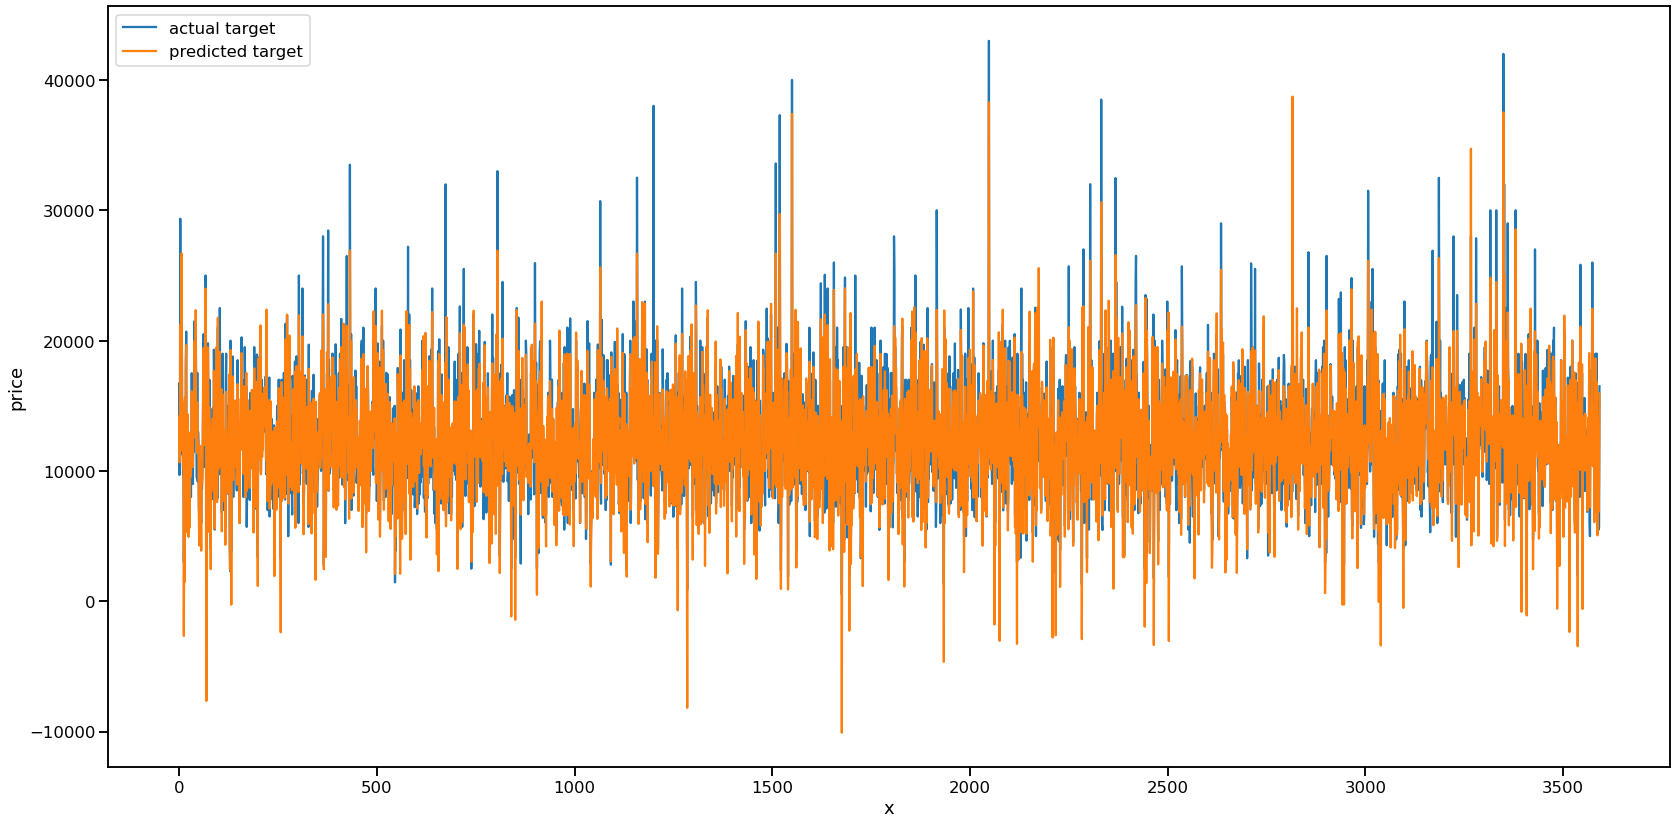

In [32]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(28,14))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

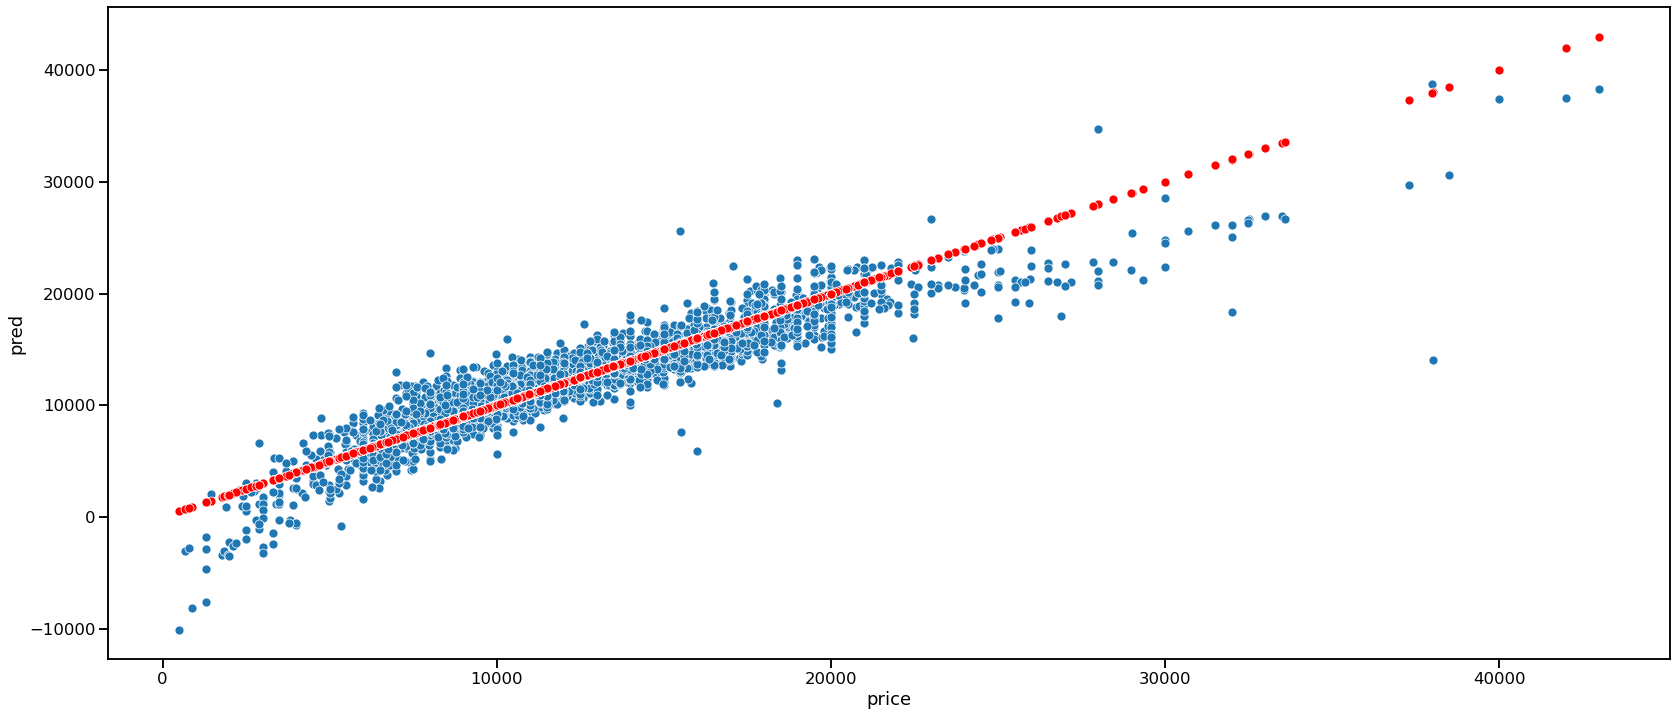

In [33]:
plt.figure(figsize=(28,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()

#### This is the end of HW2